# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
We will use the same dataset on incomes from last week (income_dataset.csv). 

The data set has the following data columns:
- age: Age in years
- workclass: Classification of workplace:
    - Private: Employed in private company
    - Local-gov: Local government
    - State-gov: State government
    - Federal-gov: Federal government 
    - Self-emp-inc: Self employed in own company
    - Self-emp-not-inc: Self employed in other legal format
- education: Education level
- educational-num: Numerical level of education 
- marital-status
- occupation 
- race
- gender
- capital-gain: Annual gains from capital investments as reported in tax return 
- capital-loss: Annual loss from capital investments 
- hours-per-week: Self-reported number of hours per week worked 
- native-country: Country of birth 
- income: Annual salary in USD (without capital gains)
- month_of_birth: Birth month (1-12)

You are allowed to use numpy, pandas, matplotlib, and seaborn packages - please do not use other packages that are not supported in the course. 

To solve this homework, you are expected to read portions of the Python for Data Analysis textbook - or use the online documentation on Python. To help you not get lost, we will point you to the relevant book section for the various tasks. However, you may have to go back and read some basics if you realize that you are missing understanding on some foundational concept. 

### Overview of plotting
As an introduction to matplotlib, step through this https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb. It is suggested that you download the notebook and run it locally to fully benefit from the tutorial.
Specific information (and further tutorials) on the various plotting functions can be found here: https://matplotlib.org/stable/users/index.html.  

### Submit via Gradescope
Please use this jupyter notebook to fill in the answers below. Before submitting, please make sure that your notebook runs correctly by restarting the kernel and rerunning the entire notebook - all outputs should be included (do **not** clear the output before submitting). Save the notebook as YourUserID_Assign01.ipynb and ensure that you have the correct file saved. Submit your notebook file by clicking on the Gradescope symbol on the left bar of the OWL page.  
Make sure that you develop your code with Python 3.7 or higher as the interpreter. The TA will not endeavor to fix code that uses earlier versions of Python (e.g. 2.7). 

### General Marking criteria: 
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels 
- All Figures require an informative caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
Preliminaries: Import the packages relevant to this Assignment

In case you notebook environment is not automatically setup to include the figures inline, you may have to run the following code: <br>
import matplotlib <br>
matplotlib.use('TkAgg') <br>
%matplotlib inline <br>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Question 1.1. Load the income dataset and calculate the new column "total" as the income + capital-gain - capital-loss (? / 2 points)

In [35]:
d = pd.read_csv('income_dataset.csv')
d['total'] = d['income'] + d['capital-gain'] - d['capital-loss']
d.total

99

### Question 1.2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables age, educational-num, income, month of birth, hours per week, and total. For each variable, choose an appropriate number of bins (? / 4 points)

Hint: For variables with discrete integer values (age, educational-num,month-of-birth, hours-per-week), it is natural to have a separate bin for each unique value. For this you need to set the number of bins to the range of the data. 
To see what happens when you do not do this, plot a histogram of age with either 50 or 100 bins. 


Text(0.5, 1.0, 'Total income')

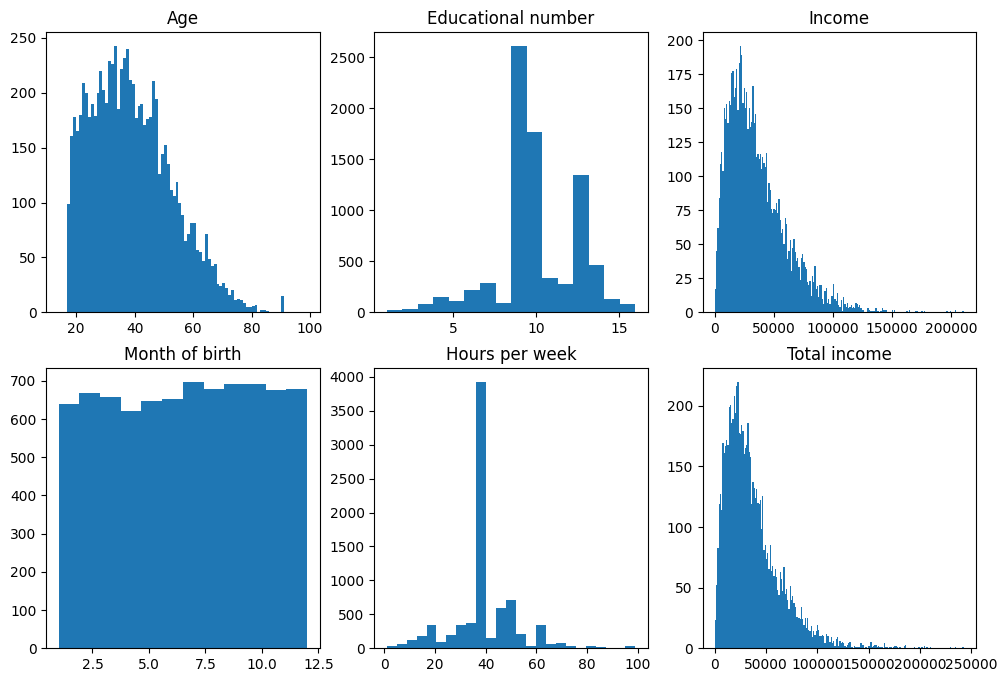

In [60]:
# Create a new figure with an array of 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot histograms for each variable
axes[0, 0].hist(d.age, bins=range(14,100))
axes[0, 0].set_title('Age')

axes[0, 1].hist(d['educational-num'], bins=d['educational-num'].nunique())
axes[0, 1].set_title('Educational number')

axes[0, 2].hist(d.income, bins=200)
axes[0, 2].set_title('Income')

axes[1, 0].hist(d['month_of_birth'], bins=12)
axes[1, 0].set_title('Month of birth')

axes[1, 1].hist(d['hours-per-week'], bins=25)
axes[1, 1].set_title('Hours per week')

axes[1, 2].hist(d.total, bins=200)
axes[1, 2].set_title('Total income')


### Question 1.3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

age: range(14,100) incapsulates all ages in the dataset with a bit of headroom, and clearly shows off all the peaks
educational number: also nunique because there aren't that many types so we can just show all of them
income: 200, a reasonably granular choice to show more variance. 100 also wouldn't be unreasonable.
month of birth: 12 months in a year, so 12 is a natural choice
hours per week: no one works more than 100 hours a week so it seems we can use 100 for bin size, but the vast majority work 40 hours, so it's reasonable to group together hours within +/- 2-3 hours of each other
total income: same reason as income

### Question 1.4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

age: slightly right skewed with a peak in the 35-40 range
educational number: multimodal with a peak at 9 and 10 (some college and hs grad), and a later smaller peak at 13 (bachelors). significant drop off from these values.
income: right skewed with a single mod on the lower end of income (30-40k)
month of birth: relatively uniform
hours per week: unimodal with a major peak at 40 and very small (relative) peaks at ~50 hours and an even smaller one at 60.
total income: essentially the same as income except there are a few more outliers at >200k

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question 2.1. Create a contingency table of gender (rows) by workclass (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [63]:
contingency_table = pd.crosstab(d['gender'], d['workclass'], margins=False)
print(contingency_table)


workclass  Federal-gov  Local-gov  Private  Self-emp-inc  Self-emp-not-inc  \
gender                                                                       
Female              76        209     1903            33               108   
Male               145        305     3684           233               508   

workclass  State-gov  
gender                
Female           131  
Male             213  


### Question 2.2. Plot the workclass counts by gender as a grouped bar chart (? / 3 points)

Text(0, 0.5, 'number of people')

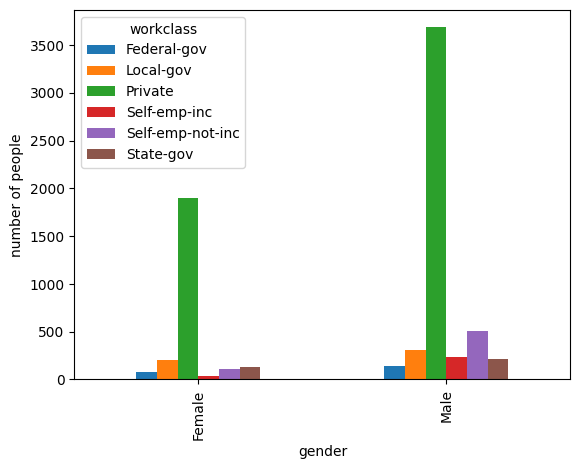

In [68]:
contingency_table.plot(kind='bar')
plt.ylabel('number of people')

### Question 2.3. Make a Figure with 2 subplots. Plot the workclass counts by gender as a grouped bar chart (as in Question 2) in one subplot, and as a stacked barchart the other subplot. (? / 3 points)

<Axes: xlabel='gender'>

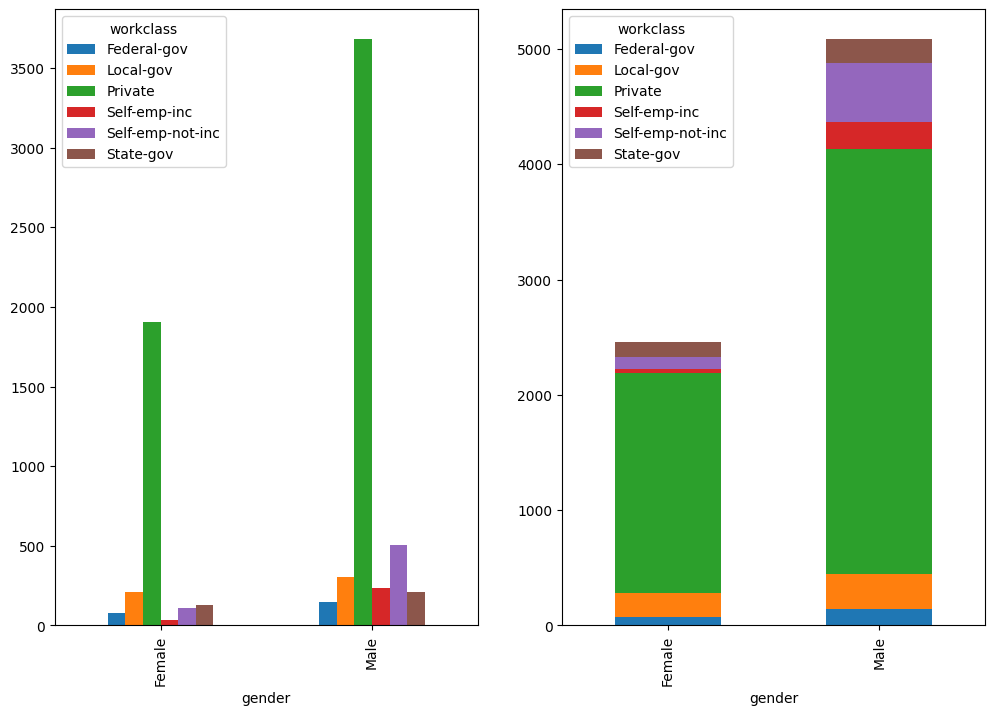

In [75]:
workclass_fig, workclass_axes = plt.subplots(1, 2, figsize=(12, 8))
contingency_table.plot(kind='bar', ax=workclass_axes[0])
contingency_table.plot(kind='bar', stacked=True, ax=workclass_axes[1])

### Question 2.4. Generate a table of gender (rows) and workclass (columns), normalized by the row-marginal counts of males and females , such that you have *conditional probabilities of workclass, given the gender* . Print the table and make a stacked barplot of these conditional probabilities. (? / 3 points)

Hint: Please check the lecture carefully for the definition of a *conditional probability* and how to compute it. We are looking here for $p(workclass | gender)$.

workclass  Federal-gov  Local-gov   Private  Self-emp-inc  Self-emp-not-inc  \
gender                                                                        
Female        0.030894   0.084959  0.773577      0.013415          0.043902   
Male          0.028498   0.059945  0.724057      0.045794          0.099843   

workclass  State-gov  
gender                
Female      0.053252  
Male        0.041863  


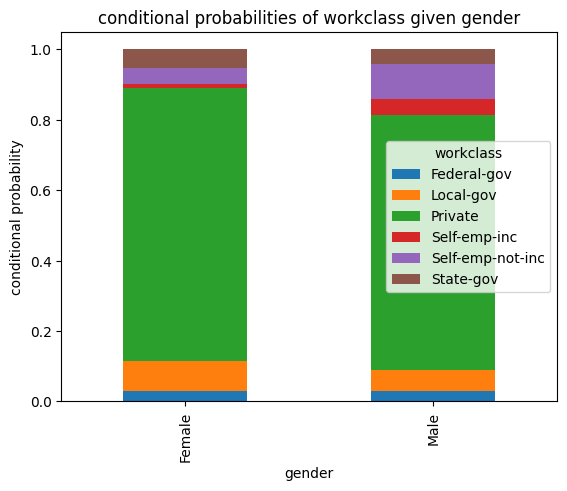

In [79]:
crosstable = pd.crosstab(d.gender, d.workclass, normalize='index')
print(crosstable)

crosstable.plot(kind='bar', stacked=True)
plt.title('conditional probabilities of workclass given gender')
plt.ylabel('conditional probability')
plt.show()

### Question 2.5. Generate a table of workclass (rows) and gender (columns), with the *conditional probabilities of the gender, given the workclass*.  Print the table and show the conditional probabilities as a stacked barplot for each workclass. Written answer: What is the height of the stacked bar (males + females) for each workclass and why? (? / 3 points)
Hint: Again - check the definition of conditional probability to determine whether you need to normalize the counts by the sum of the rows (index) or columns. 

gender              Female      Male
workclass                           
Federal-gov       0.343891  0.656109
Local-gov         0.406615  0.593385
Private           0.340612  0.659388
Self-emp-inc      0.124060  0.875940
Self-emp-not-inc  0.175325  0.824675
State-gov         0.380814  0.619186


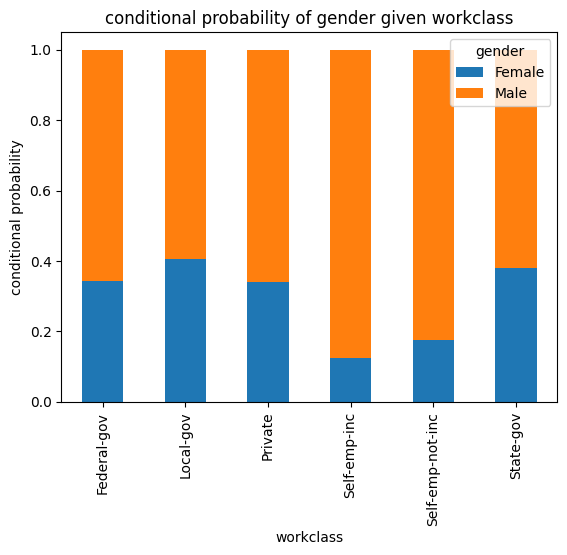

In [87]:
crosstable = pd.crosstab(d.workclass, d.gender, normalize='index')
print(crosstable)

crosstable.plot(kind='bar', stacked=True)
plt.title('conditional probability of gender given workclass')
plt.ylabel('conditional probability')
plt.show()

### Question 2.6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

from 2.4, we can see a vast majority work in the private sector and from 2.5 we can see that most people plotted are male.

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of being employed in a private company given that the gender is male, is 0.xxx__ <br>
Using the contingency tables, compute and print.

### Question 3.1. The marginal probability of a person in the sample being employed by the federal government (? / 2 points)

In [92]:
# (instances of person employed by federal government) / (total number of people employed)
print('P(federal government) =', d['workclass'].value_counts()['Federal-gov'] / d['workclass'].count())

P(federal government) = 0.02927927927927928


### Question 3.2. the marginal probability being employed by a private company (? / 2 points)

In [89]:
# same formula as above
print('P(private company) =', d['workclass'].value_counts()['Private'] / d['workclass'].count())

P(private company) = 0.7401960784313726


### Question 3.3. the marginal probability in the sample of being female (? / 2 points)

In [102]:
# female / total
print('P(female) =', d['gender'].value_counts()['Female'] / d['gender'].count())

P(female) = 0.333375


### Question 3.4. the conditional probability of being employed in Local Government given that the gender is female (? / 2 points)

In [112]:
# P(local gov | female) = P(local gov AND female) / P(female)
print('P(local gov | female) =', contingency_table.loc['Female', 'Local-gov'] / d.gender.value_counts()['Female']) # both divide by total count so this cancels out
# contingency_table.loc['Female', 'Local-gov'] / contingency_table.loc['Female'].sum() this one doesn't contain the values where workclass is empty, not sure which answer is wanted


P(local gov | female) = 0.07836520434945632


0.08495934959349594

### Question 3.5. the conditional probability of being employed in Local Government given that the gender is male (? / 2 points)

In [113]:
print('P(local gov | female) =', contingency_table.loc['Male', 'Local-gov'] / d.gender.value_counts()['Male'])
# same comment as 3.4

P(local gov | female) = 0.057191074442152635


### Question 3.6. the conditional probability of the gender being female given that the person is employed in Local government (? / 2 points)

In [114]:
print('P(female | local gov) =', contingency_table.loc['Female', 'Local-gov'] / d.workclass.value_counts()['Local-gov'])

P(female | local gov) = 0.4066147859922179


### Question 3.7.  the conditional probability of the gender being male given that the person is employed in Local government  (? / 2 points)

In [115]:
print('P(Male | local gov) =', contingency_table.loc['Male', 'Local-gov'] / d.workclass.value_counts()['Local-gov'])

P(Male | local gov) = 0.5933852140077821


### Question 3.8. How does the probability of  female change from when you don’t know the workclass to when you know that the person works in local government?  (? / 2 points)

if we don't know if they work in local government then there's only a ~33% chance they're female, if we do know they work in local government then that probability jumps to ~40%

### Question 3.9. What is the joint probability of a person being female AND employed in Local government? (? / 2 points)

In [118]:
print('P(female & local gov) =', contingency_table.loc()['Female', 'Local-gov'] / len(d)) # female & local gov / total

P(female & local gov) = 0.026125


8000

### Question 3.10. What is the expected probability of being in local government AND being female IF gender and workclass were independent? (? / 2 points)

In [122]:
# P(local gov) * P(female)
(d.workclass.value_counts()['Local-gov'] / len(d)) * (d.gender.value_counts()['Female'] / len(d)) 

0.02141934375

## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question 4.1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean income by gender. (? / 5 points)

In [124]:
gender_mean_income = d.groupby('gender')['income'].mean()
print(gender_mean_income)

gender
Female    29958.721035
Male      39205.211701
Name: income, dtype: float64


### Question 4.2. Determine and print the mean income by workclass. For this question use a for loop to iterate over the different workclasses that exist. This needs to be done in three steps (? / 15 points)

You need to use a for loop here- do not simply write down individual print statements 

#### a. Use the groupby function to calculate the mean by workclass (? / 3 points)

In [130]:
workclass_mean_incomes = d.groupby('workclass')['income'].mean()
print(workclass_mean_incomes)

workclass
Federal-gov         45349.361991
Local-gov           38897.745136
Private             34924.670664
Self-emp-inc        49726.165414
Self-emp-not-inc    39795.902597
State-gov           38128.581395
Name: income, dtype: float64


#### b. Create a variable that stores the names of each workclass  (? / 3 points)


In [132]:
workclass_names = {
  'Federal-gov': 'Federal government',
  'Local-gov': 'Local government',
  'Private': 'Private company',
  'Self-emp-inc': 'Self-employed incorporated',
  'Self-emp-not-inc': 'Self-employed, not incorporated',
  'State-gov': 'State government',
}

#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean income for an xxxx  is yyyy. (? / 9 points)

In [134]:
for w in workclass_names:
  print('The mean income for {} is ${:,.2f}.'.format(workclass_names[w], workclass_mean_incomes[w]))

The mean income for Federal government is $45,349.36.
The mean income for Local government is $38,897.75.
The mean income for Private company is $34,924.67.
The mean income for Self-employed incorporated is $49,726.17.
The mean income for Self-employed, not incorporated is $39,795.90.
The mean income for State government is $38,128.58.


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  
For more information on seaborn, please see the documentation: https://seaborn.pydata.org/

### Question 5.1.Using _groupby_ create two series, one that has the income for males, and one for females.  Use _groupby_ to first group the income values by gender and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [136]:
gender_group = d.groupby('gender')['income']

male_incomes = gender_group.get_group('Male')
female_incomes = gender_group.get_group('Female')


### Question 5.2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

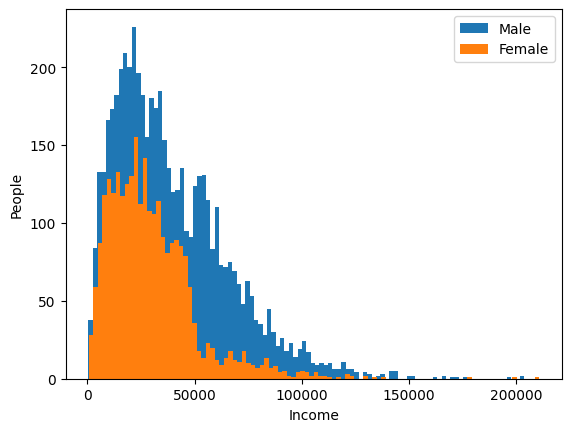

In [146]:
plt.hist(male_incomes, bins=100, label='Male')
plt.hist(female_incomes, bins=100, label='Female')

plt.xlabel('Income')
plt.ylabel('People')
plt.legend()
plt.show()


### Question 5.3. Plot the same data, using a boxplot, splitting by gender (? / 4 points)

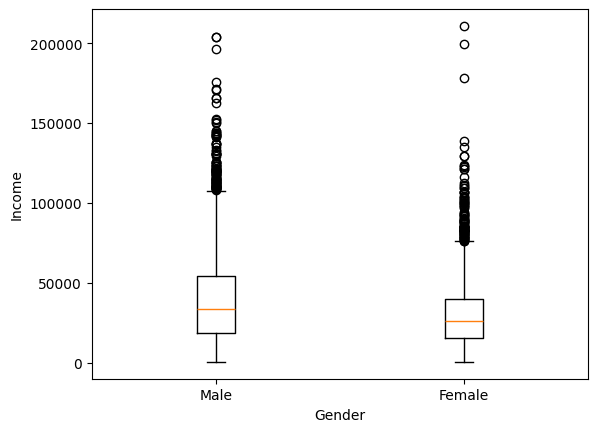

In [155]:
plt.boxplot([male_incomes, female_incomes])
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

### Question 5.4. Plot the same data using a violin plot, splitting by gender. (? / 4 points)

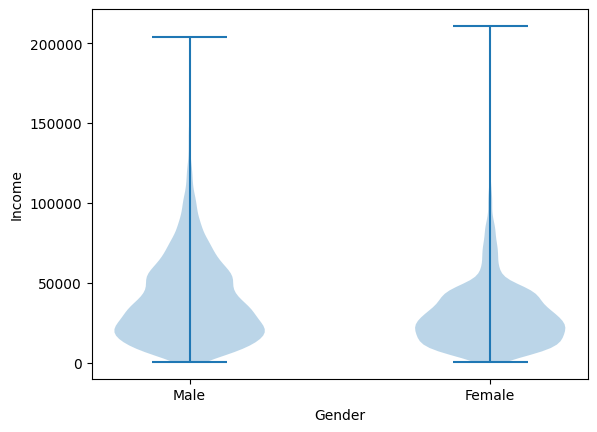

In [154]:
plt.violinplot([male_incomes, female_incomes])
plt.xticks([1,2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

### Question 5.5. Make a boxplot of income split by workclass. (? /4 points)

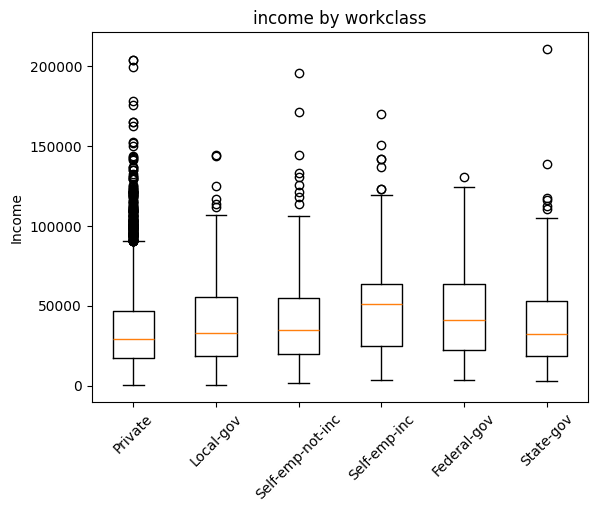

In [198]:
workclass_incomes = d.groupby('workclass')['income']
workclasses = [w for w in d.workclass.unique()]
workclasses.remove(np.nan)

plt.boxplot([workclass_incomes.get_group(w) for w in workclasses])
plt.xticks(range(1, len(workclasses) + 1), workclasses, rotation=45) #[workclass_names[w] for w in workclasses] didn't like how this looked
plt.ylabel('Income')
plt.title('income by workclass')
plt.show()

### Question 5.6. Make a violin plot of income - with workclass on the x-axis, and then split by gender. In which workclass does the gender pay gap look smallest? (? / 4 points).
Hint: doing plots where the data is split by multiple categories is easy in seaborn - using hue as additional input argument. 


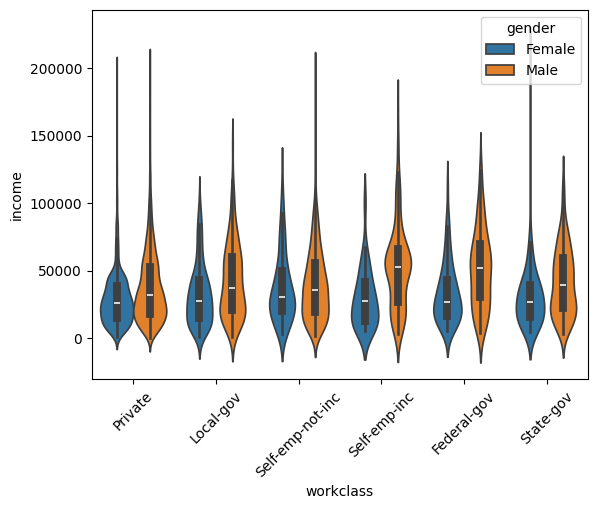

In [199]:

sns.violinplot(x='workclass', y='income', hue='gender', data=d)
plt.xticks(range(0, len(workclasses)), workclasses, rotation=45)
plt.show()
# I think it's diffcult to say which gap looks the smallest, local-gov shares a very similar shape and there's a big overlap but the male peak is still a decent bit higher
# state gov is interesting because the female max is much higher than the male max but the bottom half trends higher for male